In [1]:
#importaciones
from IPython.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
plt.subplots(figsize=(15,4))
%matplotlib inline 
plt.style.use('default')
import datetime
import math
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
# Leyendo csvs
df_edu = pd.read_csv("../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
df_gen_edad = pd.read_csv("../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", parse_dates=['fechanacimiento'])
df_vistas = pd.read_csv("../datos_navent_fiuba/fiuba_3_vistas.csv", parse_dates=['timestamp'])
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])
df_avisos_detalle = pd.read_csv("../datos_navent_fiuba/fiuba_6_avisos_detalle.csv")


In [4]:
# limpieza de fechas invalidas
df_gen_edad["fechanacimiento"] = pd.to_datetime(df_gen_edad["fechanacimiento"], errors="coerce")

def calc_edad(x):    
    if (pd.isnull(x)):
        return -1
    return math.floor((datetime.datetime.today()-x).days / 365)

# calculo edad para cada postulante
df_gen_edad["edad"] = df_gen_edad["fechanacimiento"].apply(calc_edad)

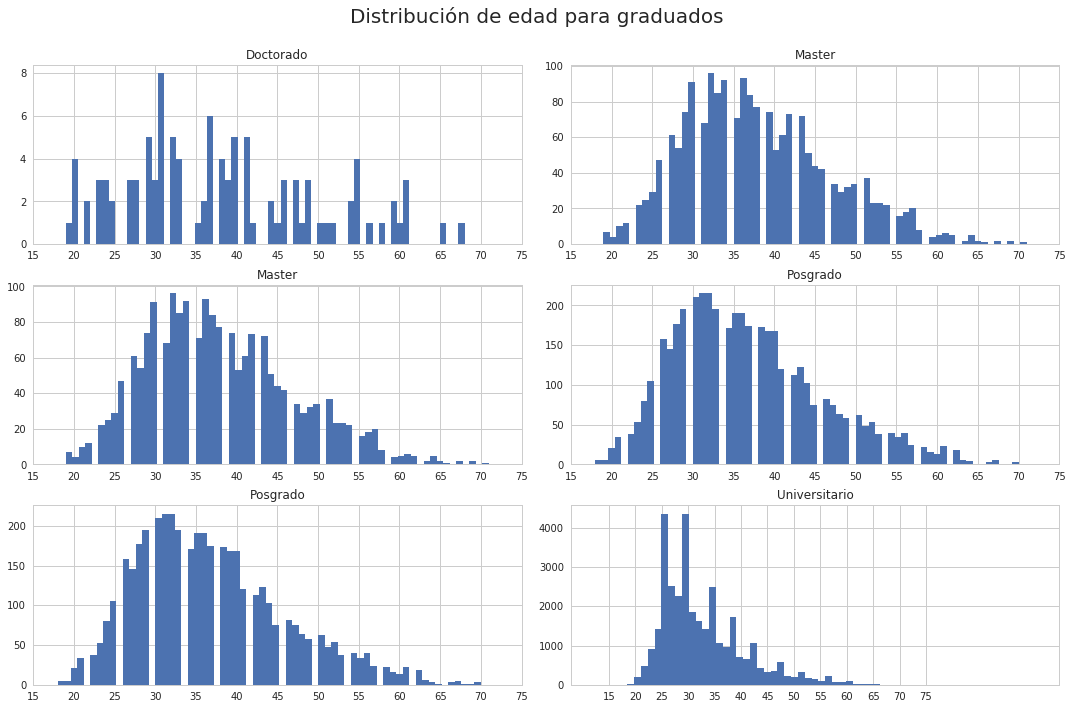

In [117]:
orden_nombre = {
    "Doctorado":0,
    "Master":1,
    "Posgrado":2,
    "Universitario":3,
    "Terciario/Técnico":4,
    "Secundario":5,
    "Otro":6
}

orden_estado = {
    "Graduado":0,
    "En Curso":1,
    "Abandonado":2,
}

df_edu["prioridad_nom"] = df_edu["nombre"].apply(lambda nombre: orden_nombre.get(nombre))
df_edu["prioridad_est"] = df_edu["estado"].apply(lambda estado: orden_estado.get(estado))

df_edu.sort_values(by= ["idpostulante","prioridad_est","prioridad_nom"],inplace= True)

df_edu_unicos_max = df_edu.drop_duplicates(subset = "idpostulante",keep= "first")

df_edu_unicos_con_edad = df_edu_unicos_max.loc[df_edu_unicos_max['estado'] == 'Graduado']\
                                          .merge(df_gen_edad, on='idpostulante')
df_edu_unicos_con_edad = df_edu_unicos_con_edad.loc[df_edu_unicos_con_edad['edad'] > 0]
    
fig, axes = plt.subplots(3, 2, figsize=(15,10))

fig.suptitle("Distribución de edad para graduados", fontsize=20)

nombres = list(orden_nombre.keys())

for i in range(0, 3):
    for j in range(0, 2):
        ax = axes[i][j]
        nom = nombres[i + j]
        
        serie = df_edu_unicos_con_edad.groupby(['nombre']).get_group(nom)['edad']
        
        ticks = np.arange(15, 80, 5)
        
        ax.hist(serie, 80 - 15) # uno para cada edad
        ax.set_title(nom)
        ax.set_xticks(ticks)
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)